--- DataFrame Shape ---
(456, 17)

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   diagnosis                  456 non-null    object
 1   general_state              456 non-null    object
 2   ectoparasites              456 non-null    object
 3   nutritional_state          456 non-null    object
 4   coat                       456 non-null    object
 5   nails                      456 non-null    object
 6   mucosa_color               456 non-null    object
 7   muzzle_ear_lesion          456 non-null    object
 8   lymph_nodes                456 non-null    object
 9   blepharitis                456 non-null    object
 10  conjunctivitis             456 non-null    object
 11  alopecia                   456 non-null    object
 12  bleeding                   456 non-null    object
 13  skin_le

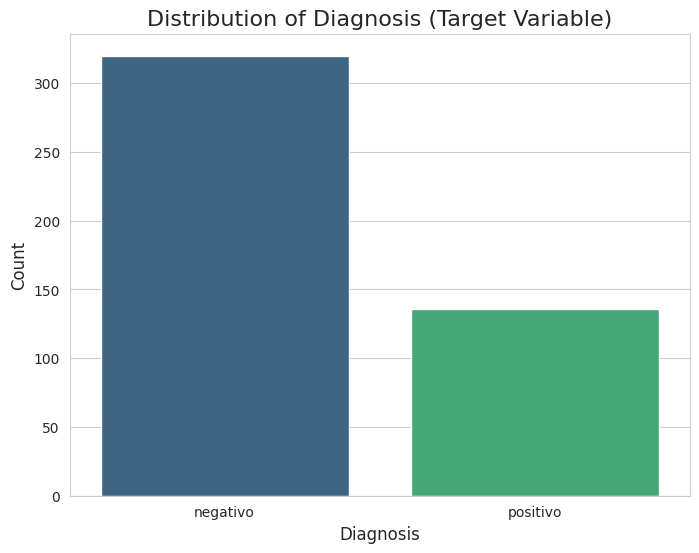

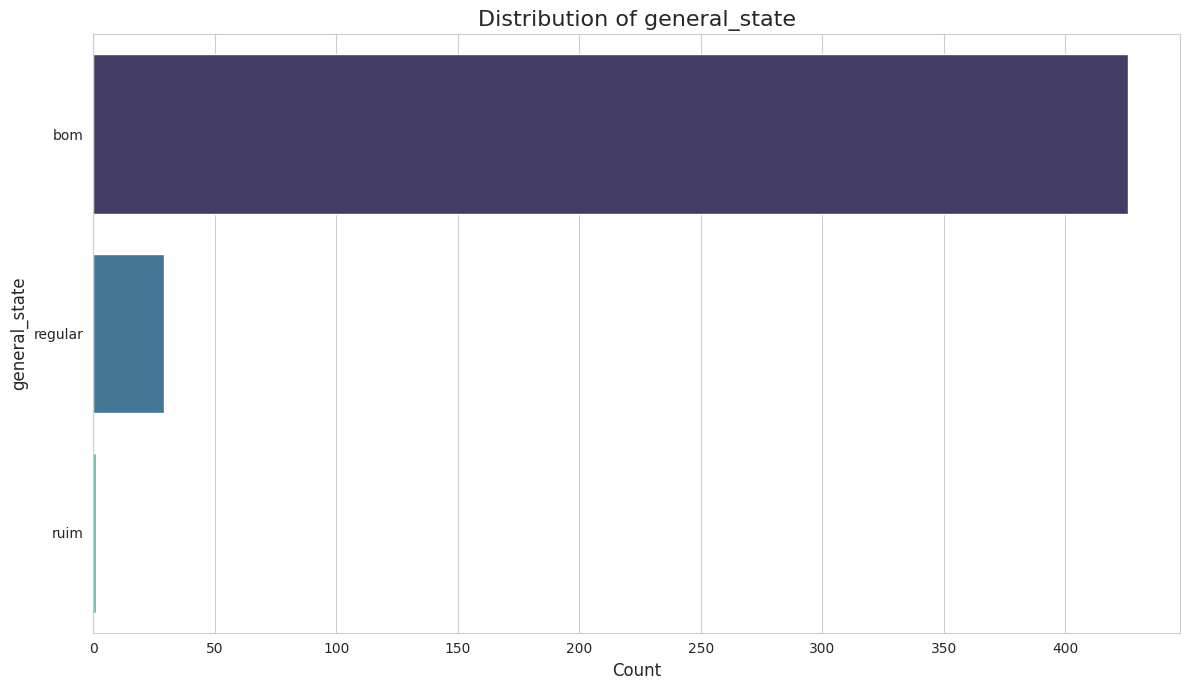

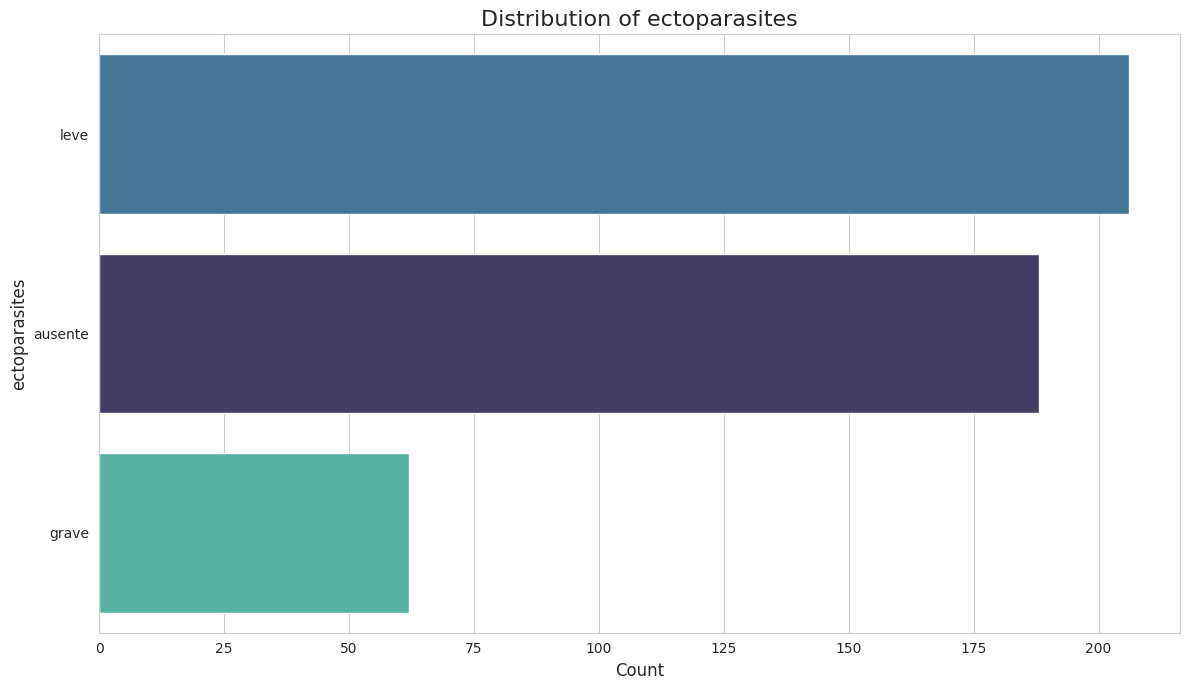

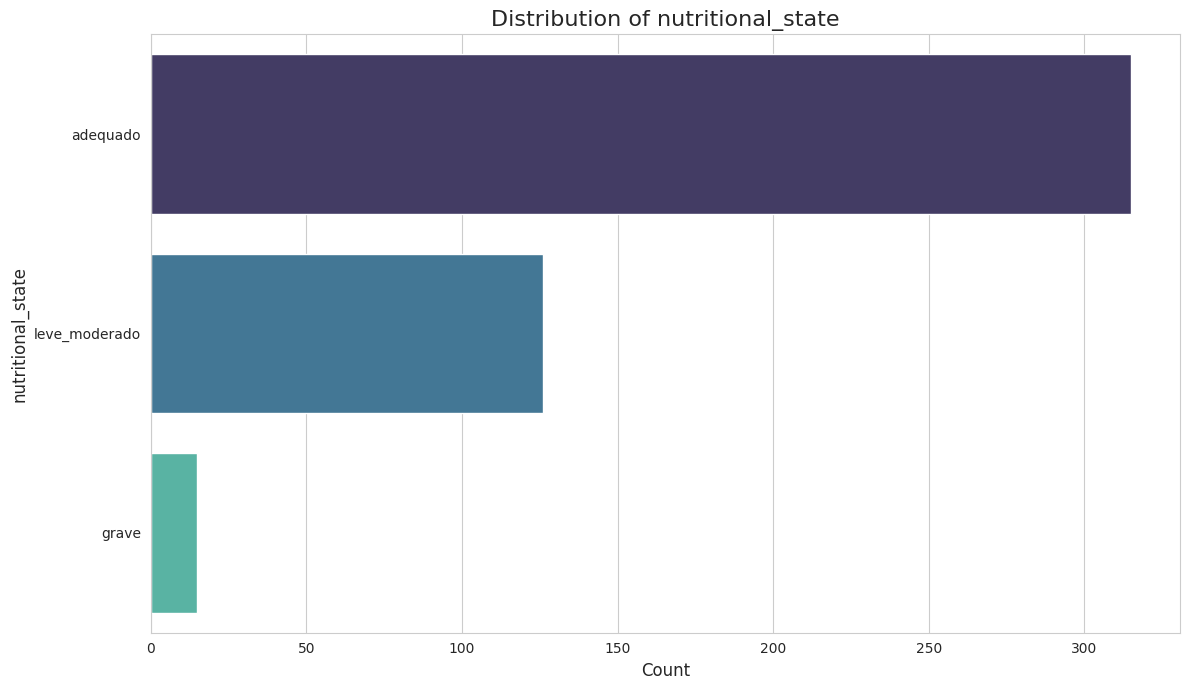

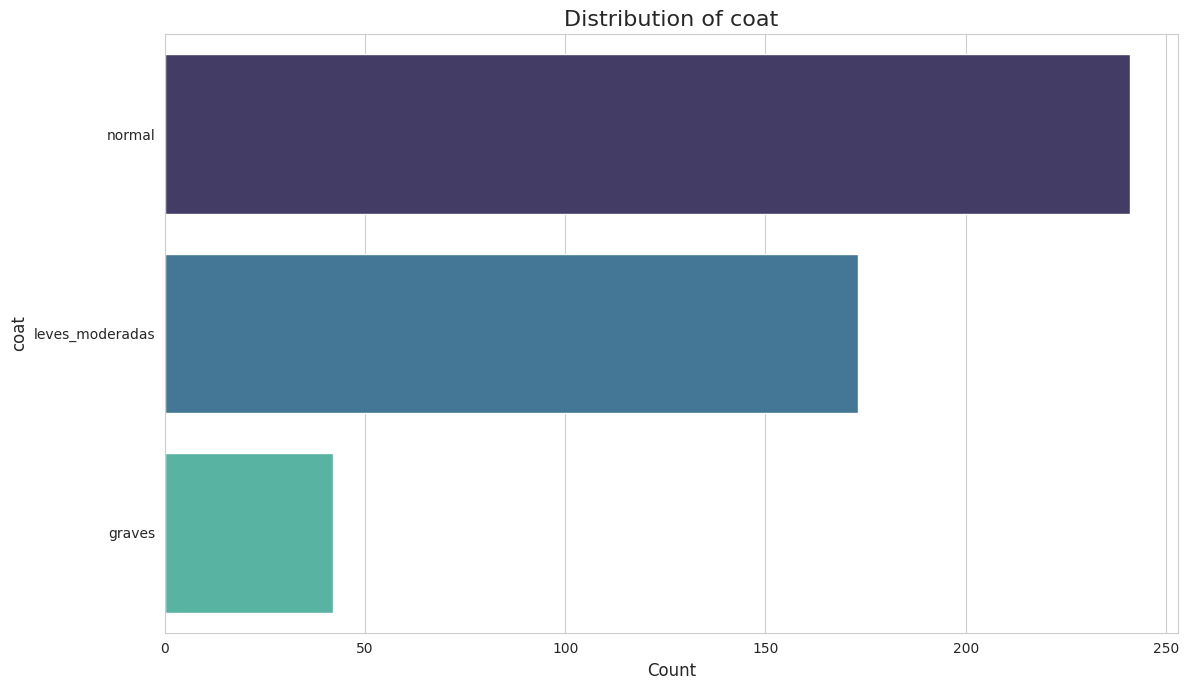

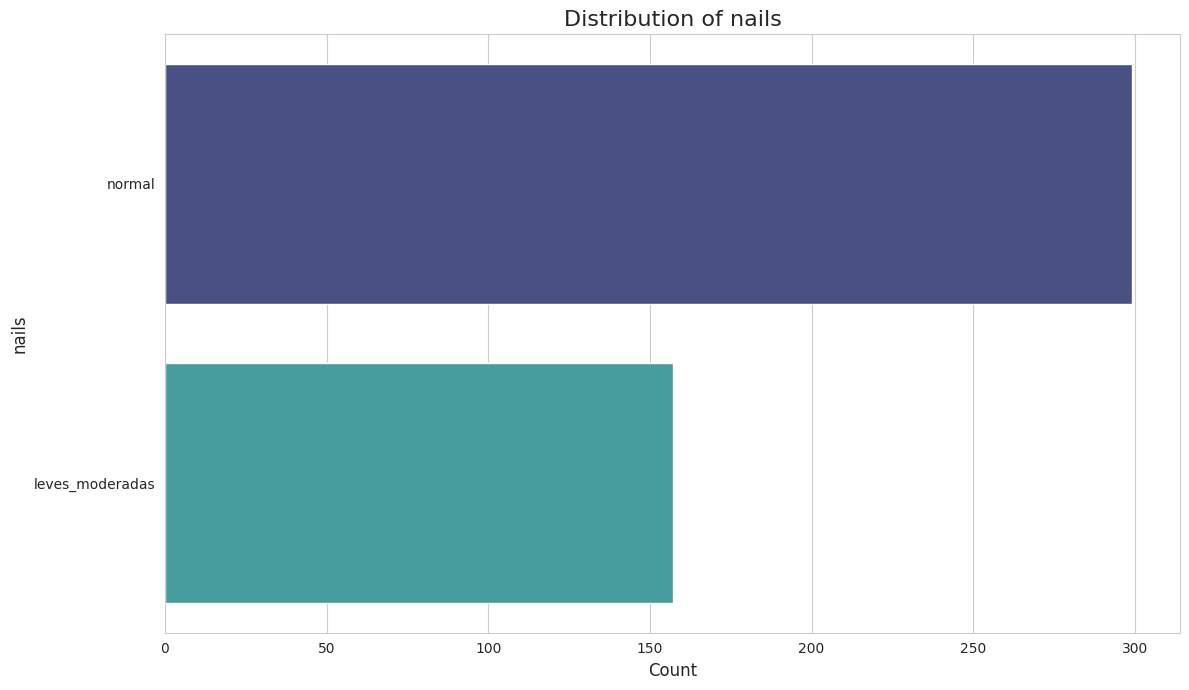

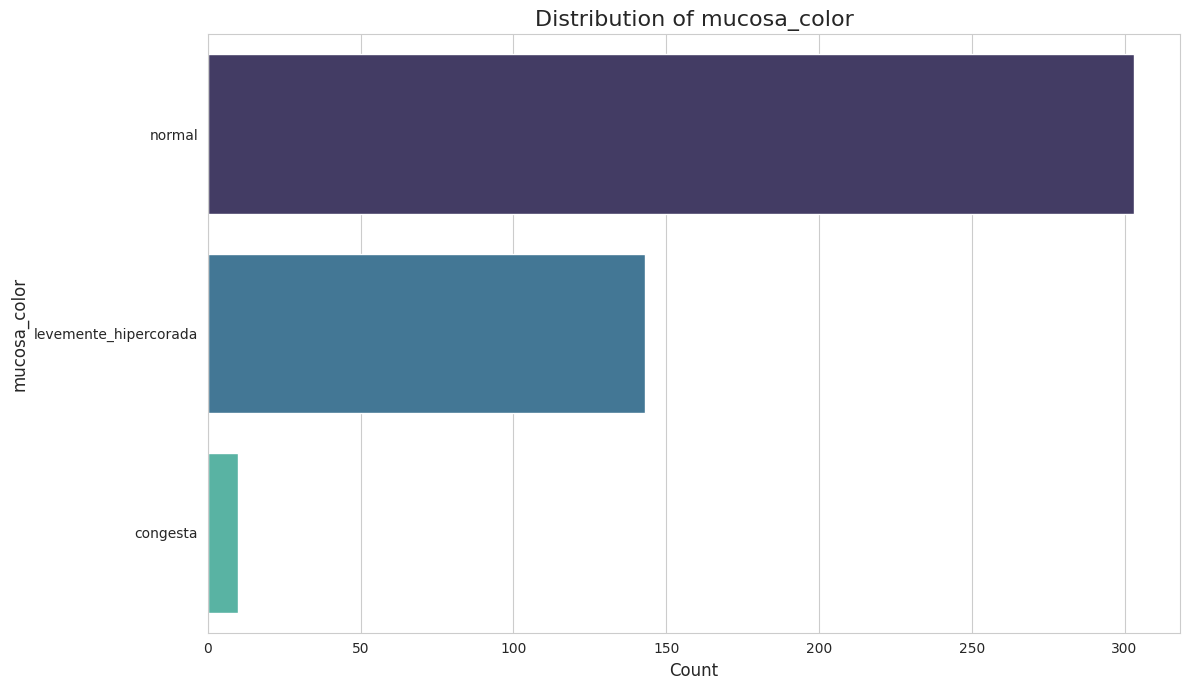

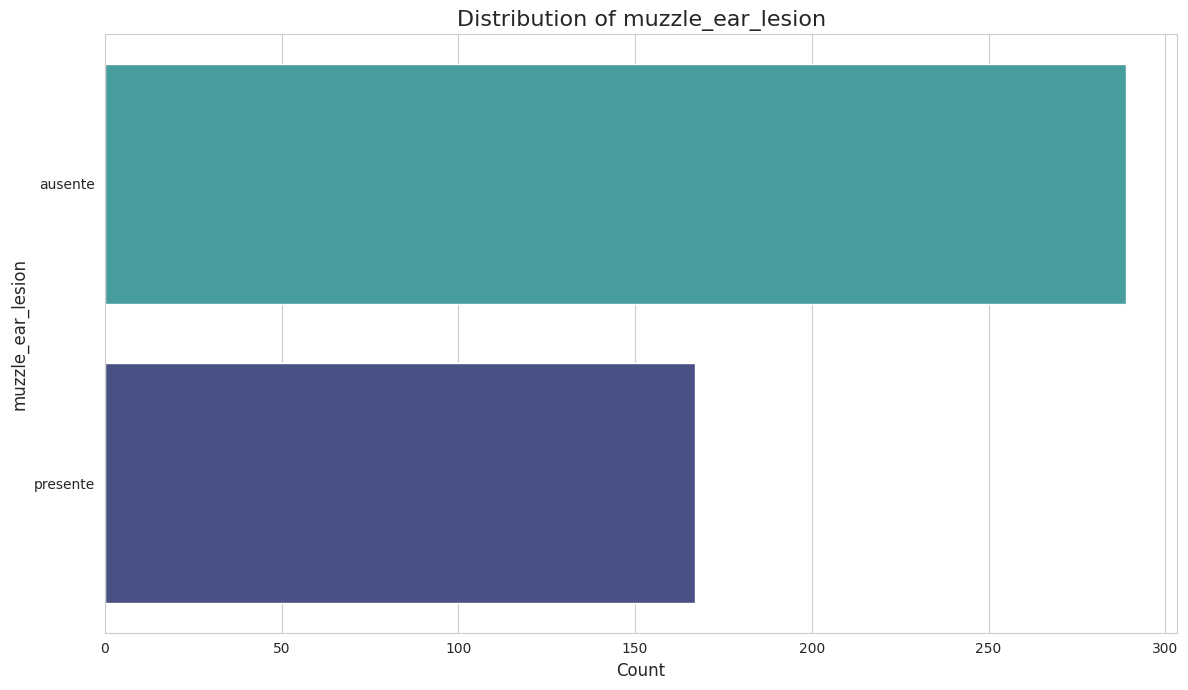

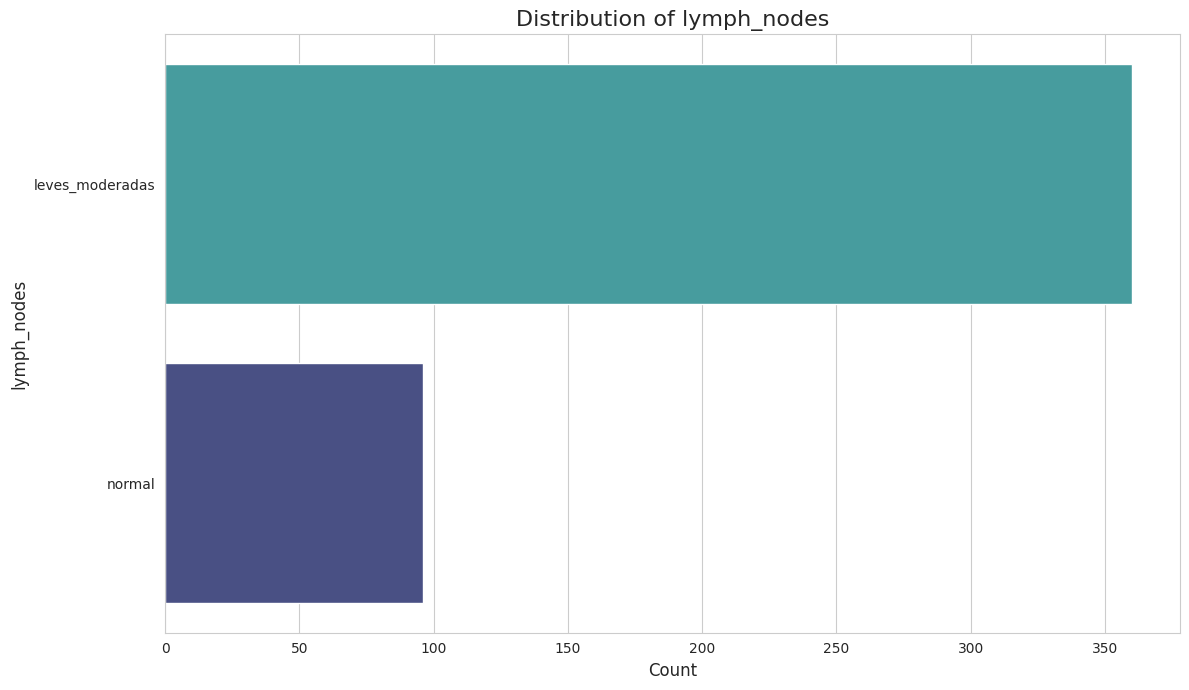

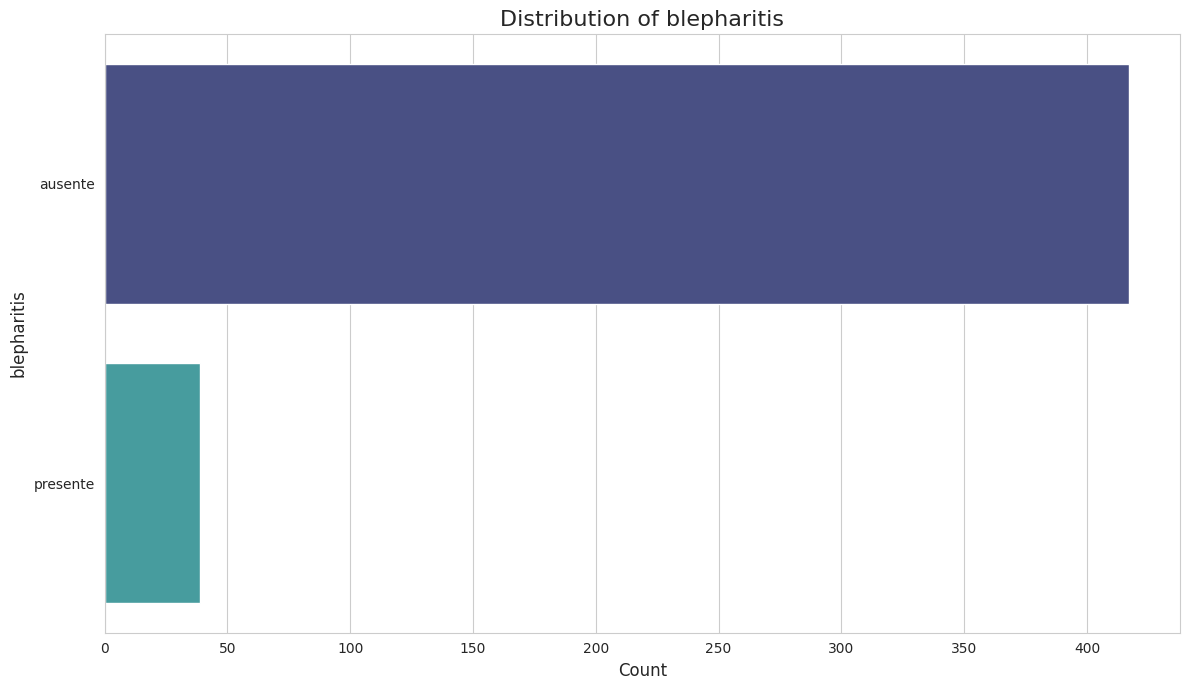

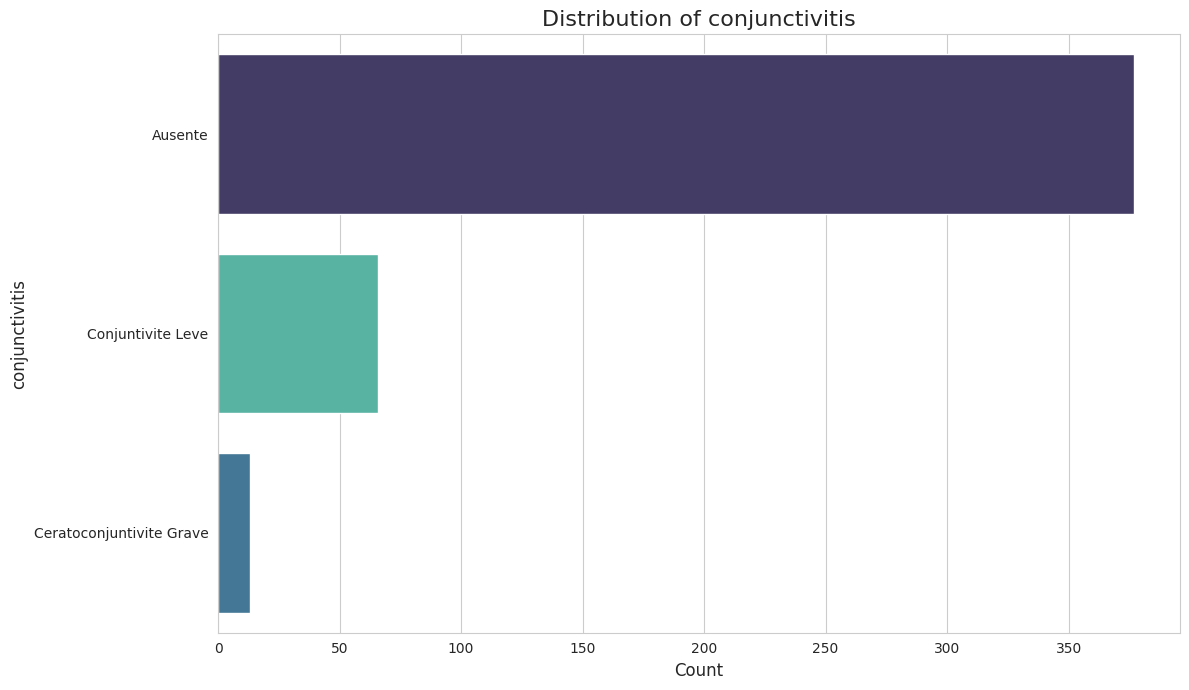

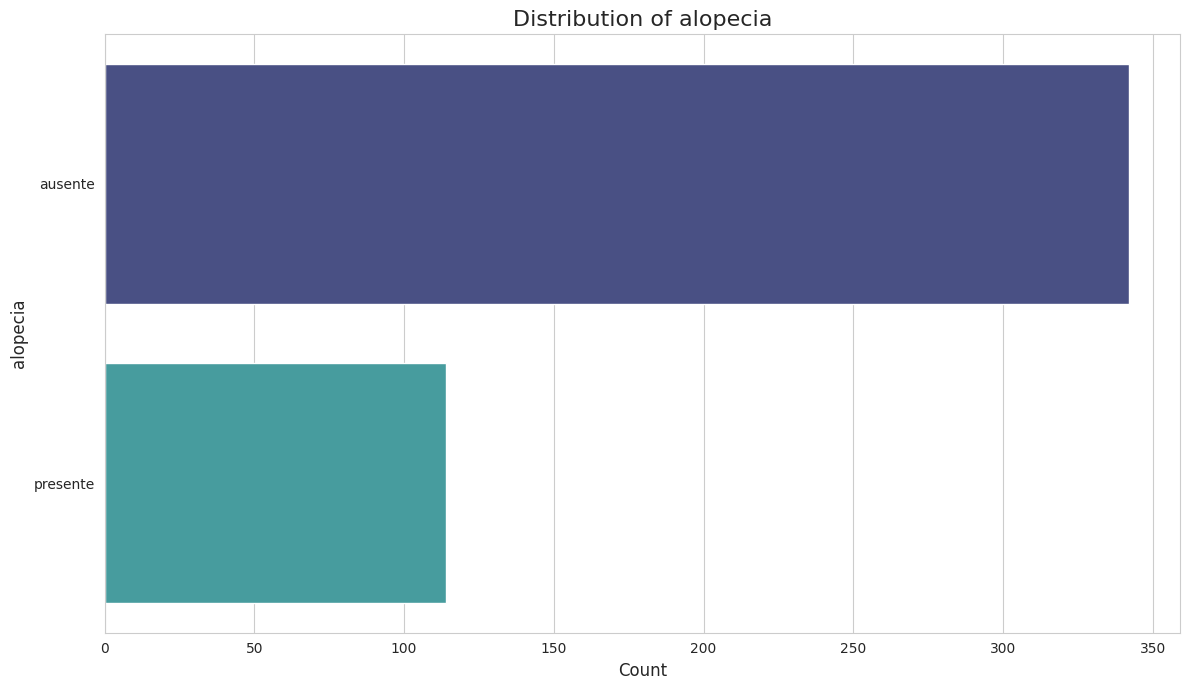

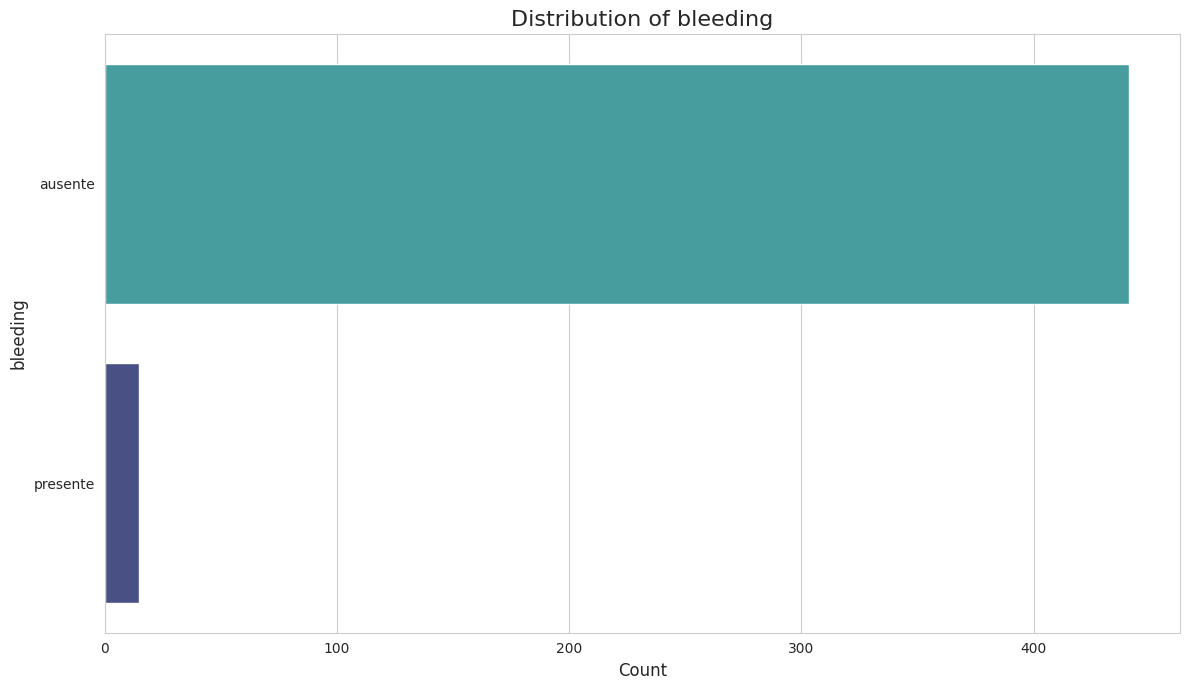

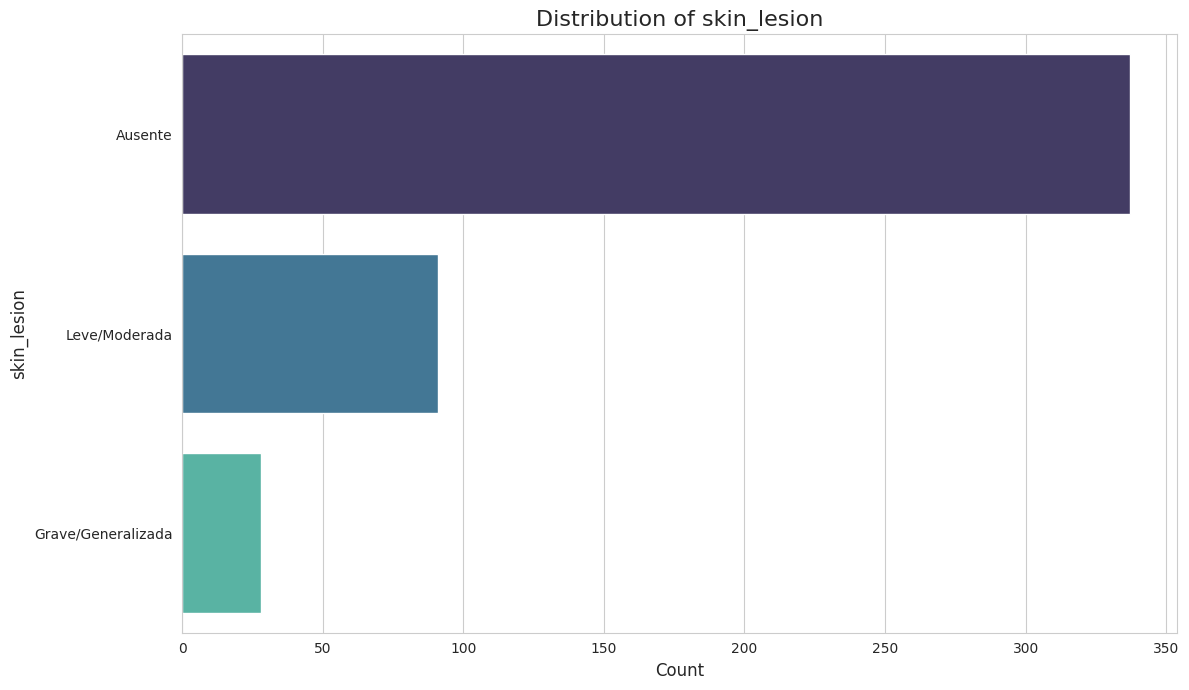

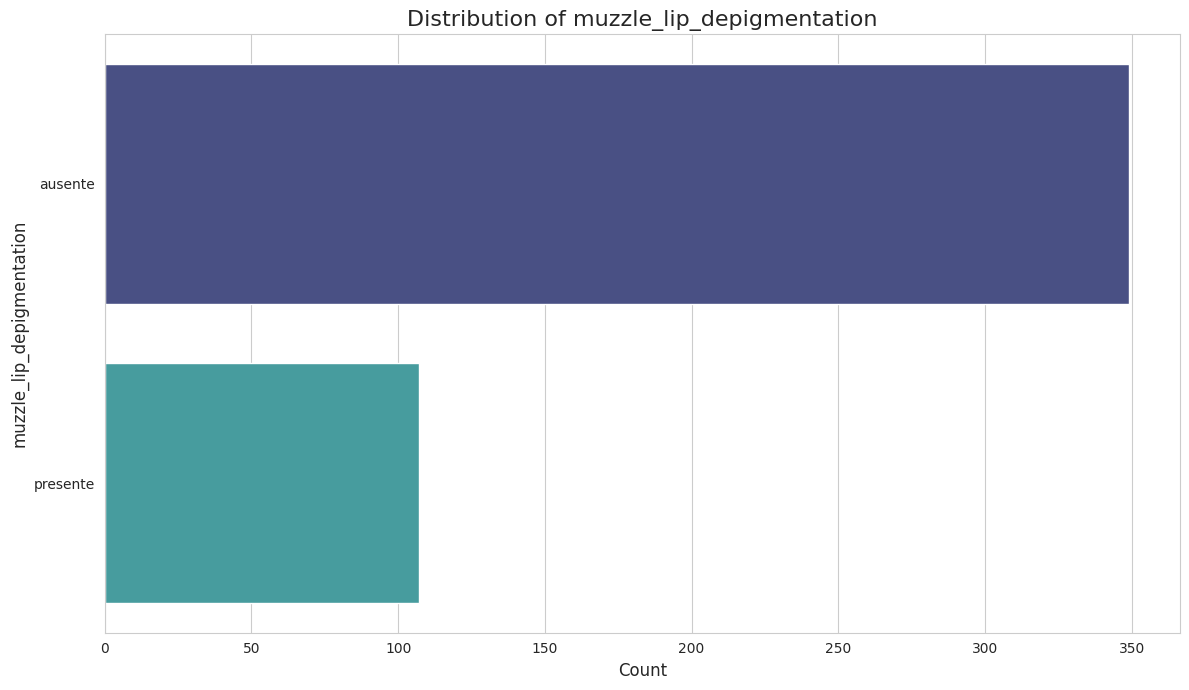

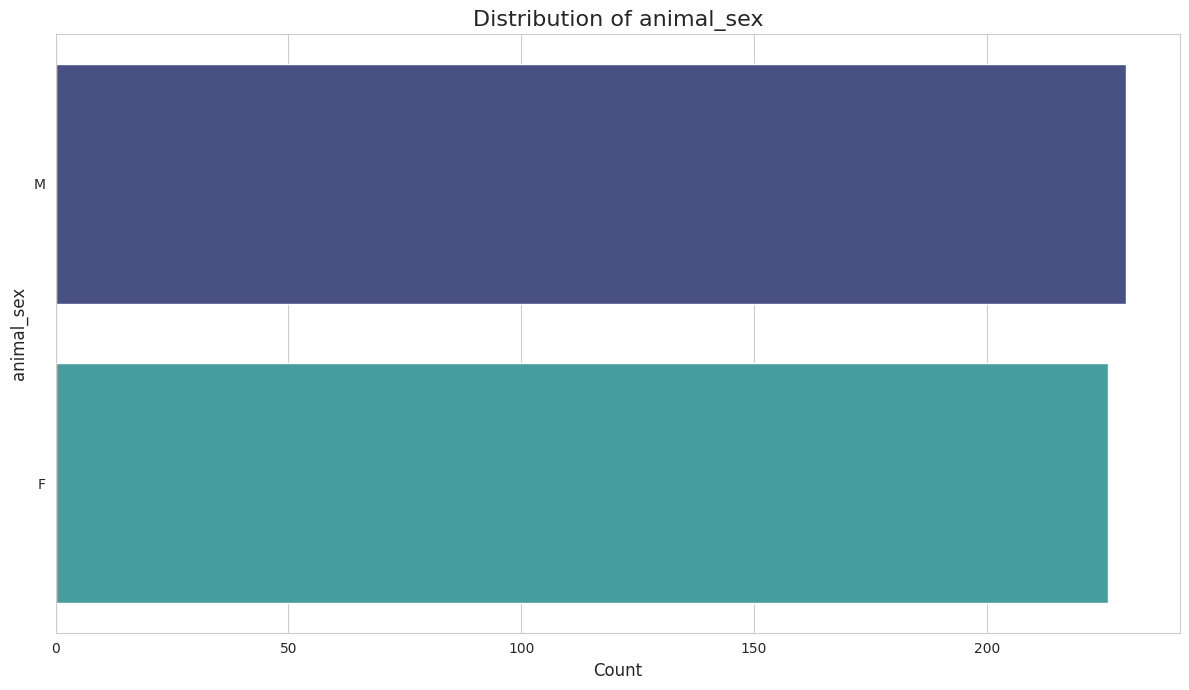

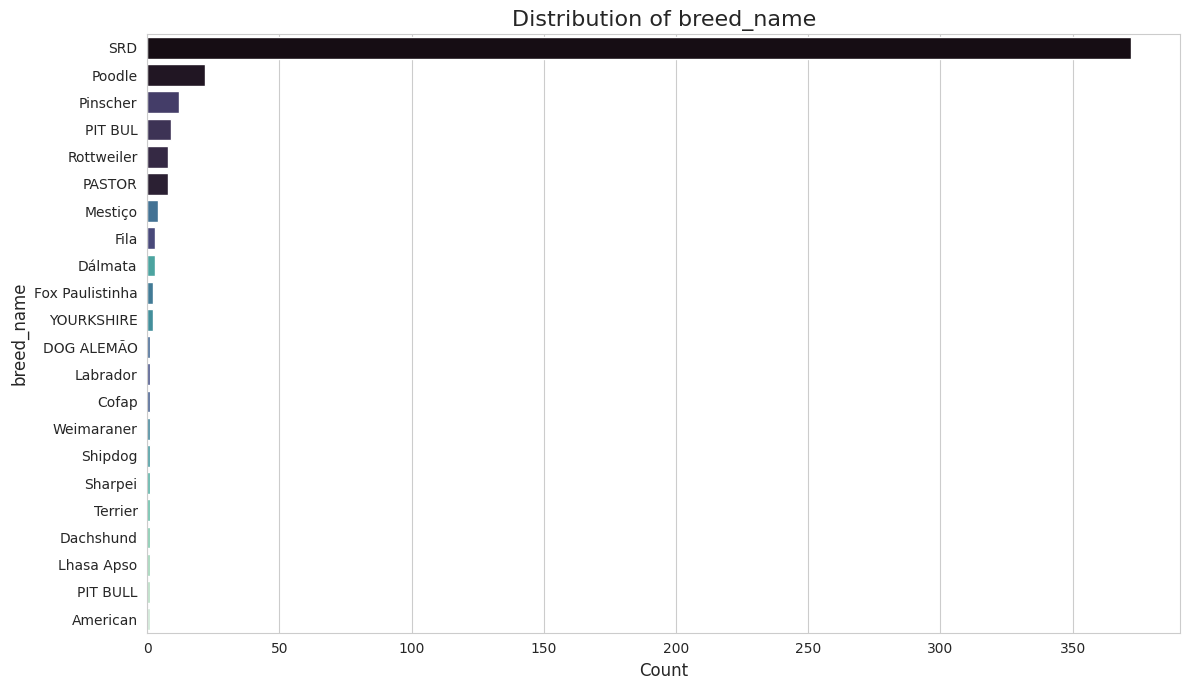

--- Analyzing Correlation between Features and Diagnosis ---


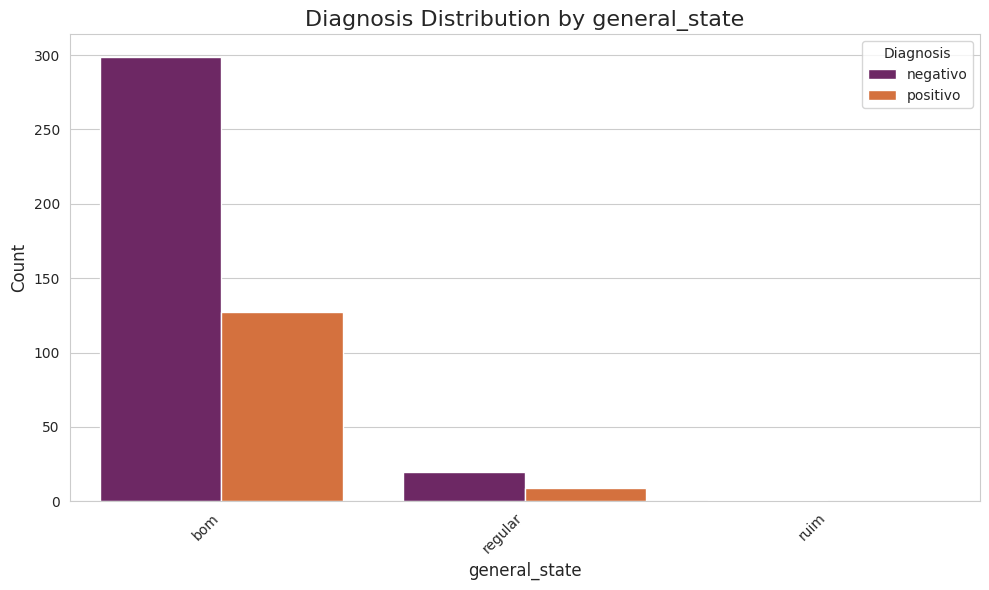

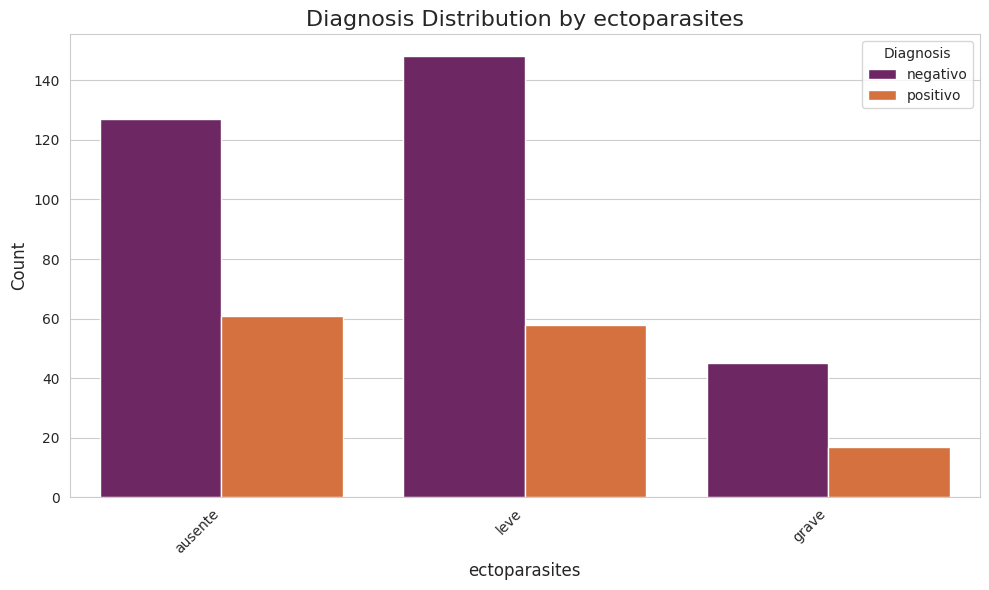

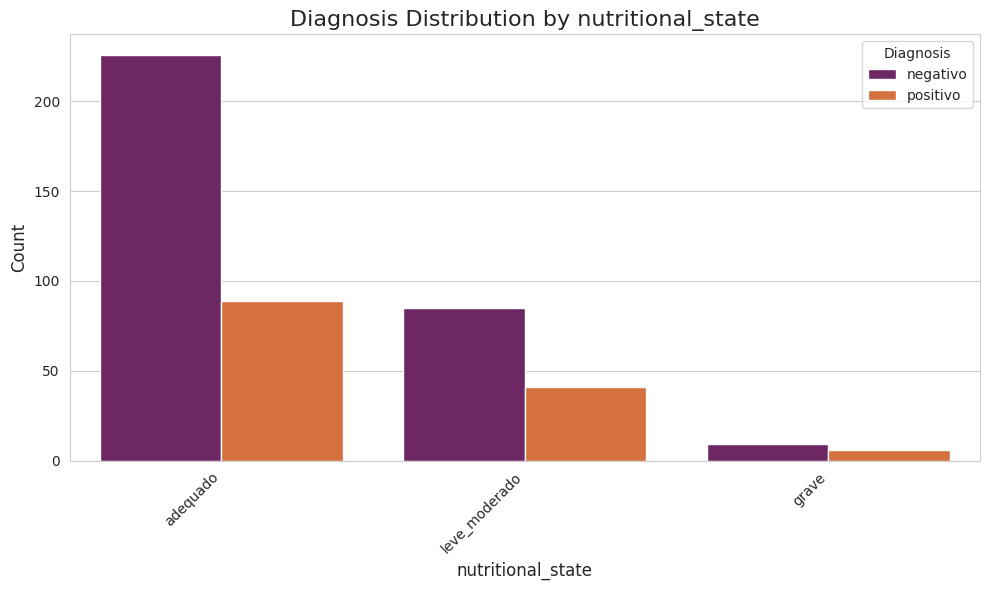

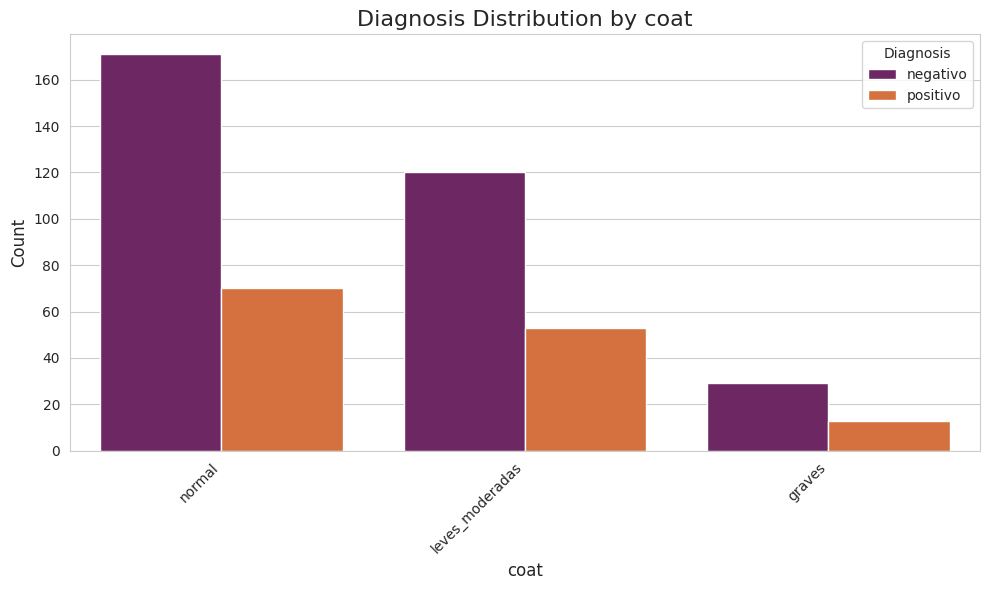

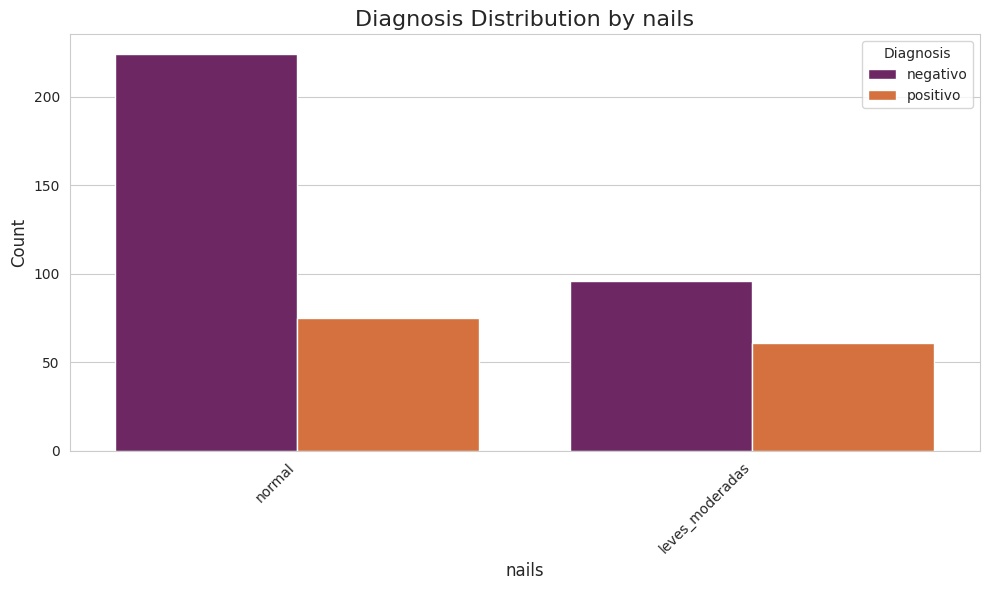

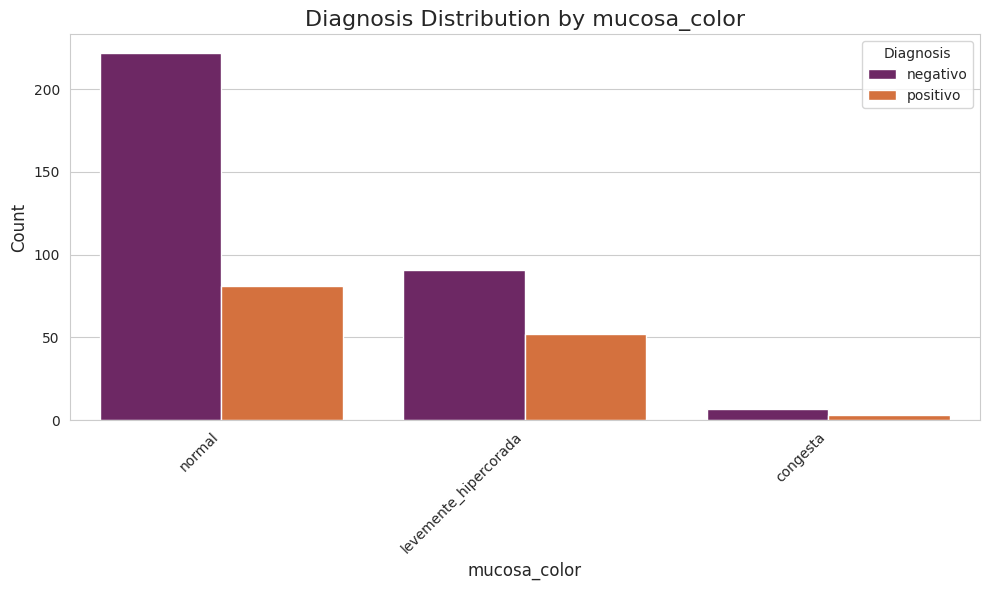

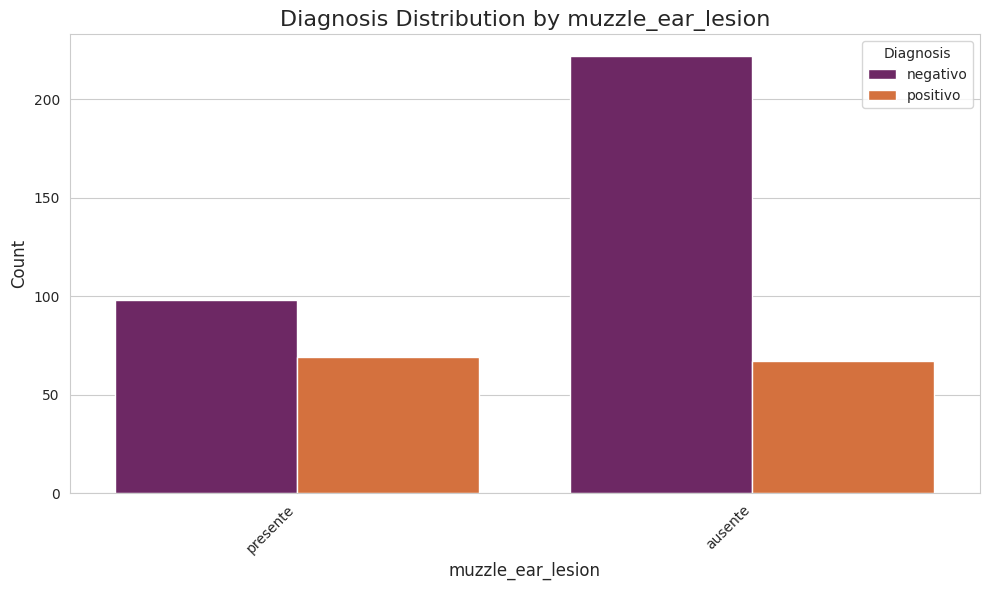

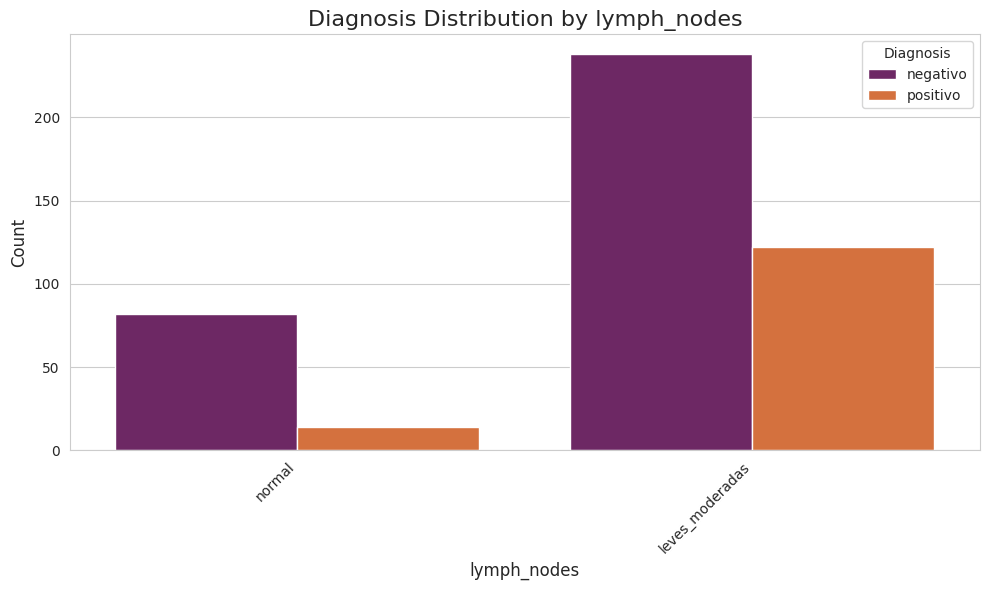

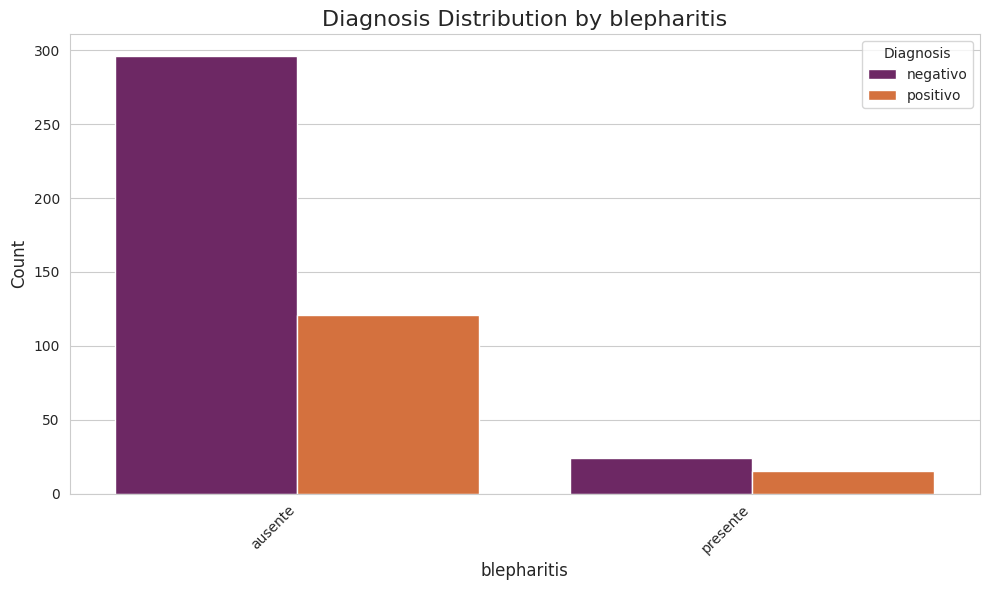

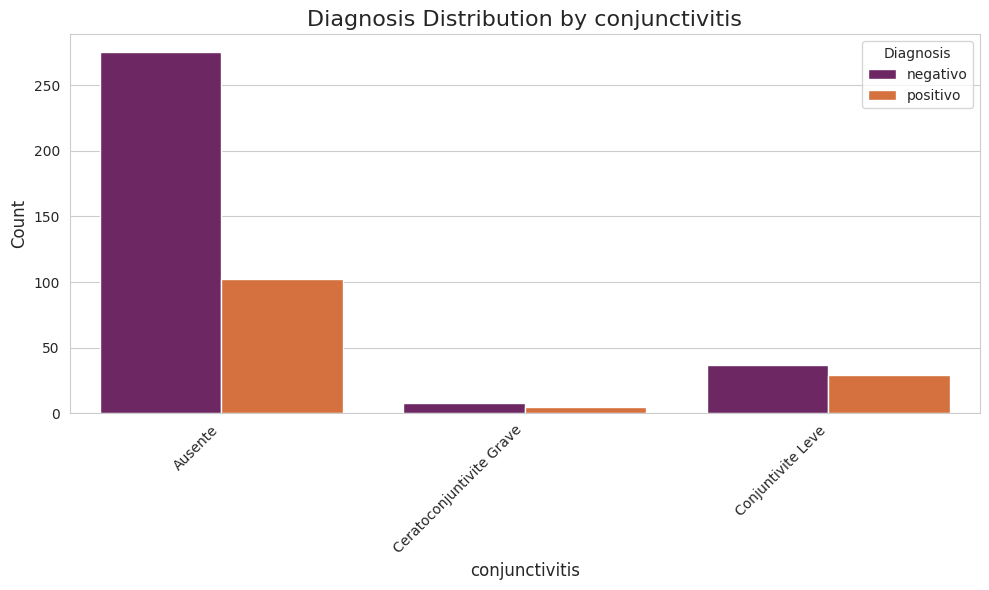

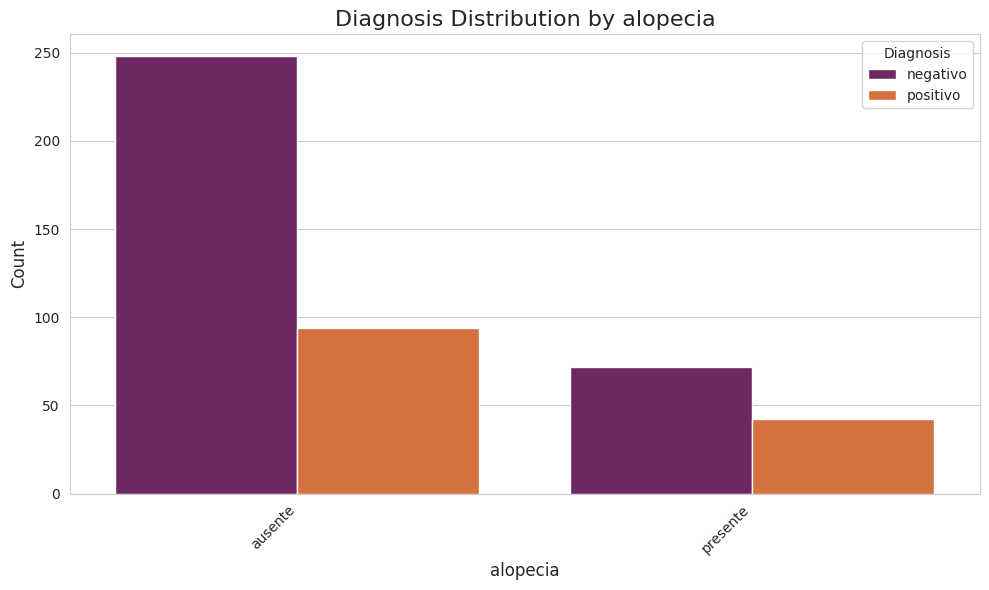

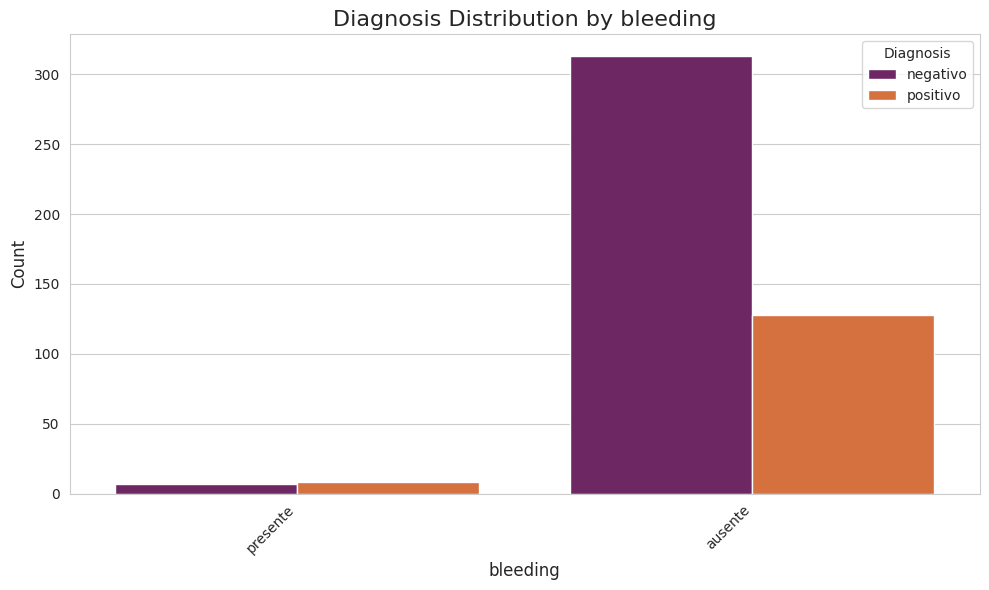

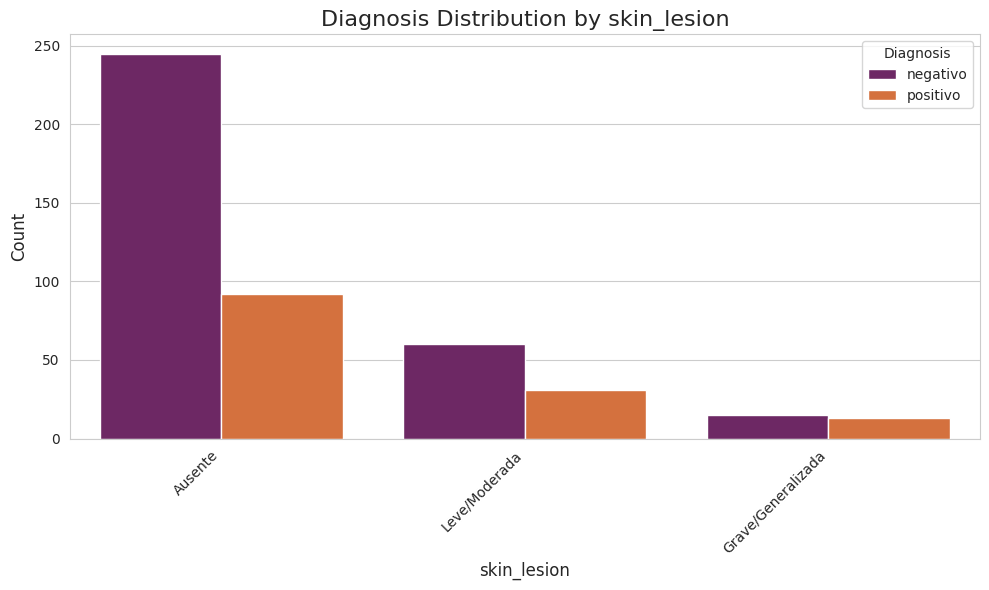

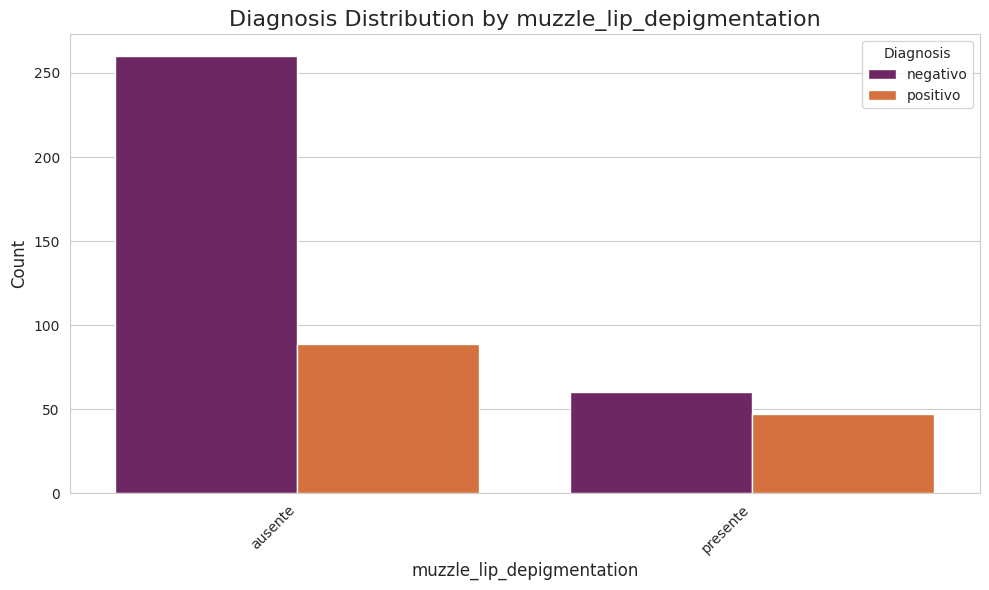

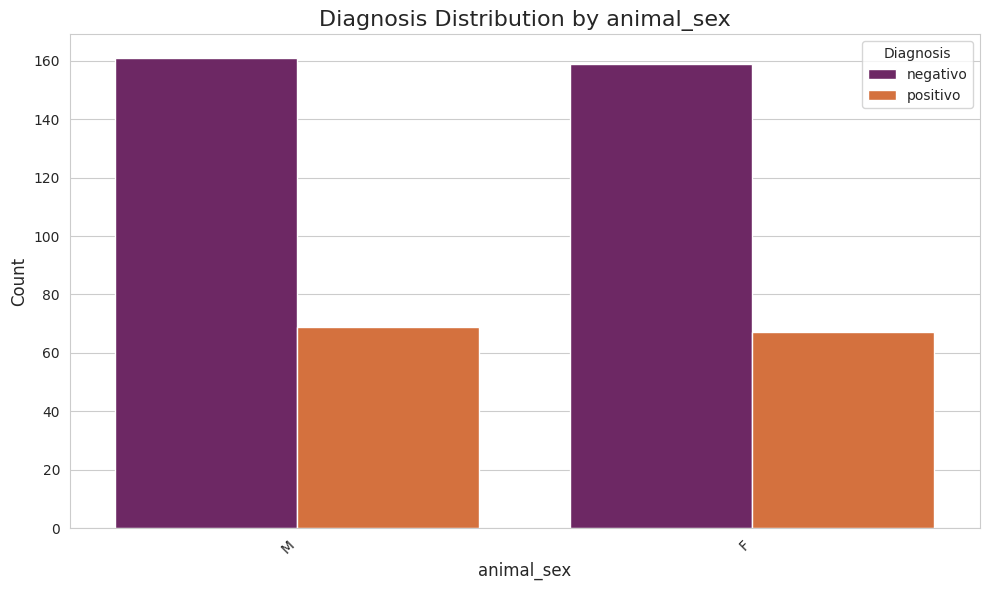

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Load the Dataset ---
# Use a relative path to load the data we created with the loader script
file_path = '../data/raw/leish_dataset.csv'
df = pd.read_csv(file_path)

# --- 2. Initial Data Inspection ---
print("--- DataFrame Shape ---")
print(df.shape)
print("\n--- DataFrame Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())

# --- 3. Target Variable Analysis ---
# Set the plot style
sns.set_style("whitegrid")

# Plot the distribution of the target variable 'diagnosis'
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='viridis', hue='diagnosis', legend=False)
plt.title('Distribution of Diagnosis (Target Variable)', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# --- 4. Categorical Feature Analysis ---
# Select only the object columns (our Enums and strings) for visualization
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'diagnosis':
        plt.figure(figsize=(12, 7))
        # This is the corrected line
        sns.countplot(y=col, data=df, order = df[col].value_counts().index, palette='mako', hue=col, legend=False)
        plt.title(f'Distribution of {col}', fontsize=16)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.tight_layout()
        plt.show()

# --- 5. Bivariate Analysis (Feature vs. Target) ---
# This section explores the relationship between each clinical feature and the diagnosis.

print("--- Analyzing Correlation between Features and Diagnosis ---")

# We reuse the list of categorical columns from before
for col in categorical_cols:
    if col not in ['diagnosis', 'breed_name']: # Exclude the target itself and high-cardinality columns for now
        plt.figure(figsize=(10, 6))
        
        # Create a count plot with 'diagnosis' as the hue
        # This will create separate bars for 'Positivo' and 'Negativo' for each category
        sns.countplot(x=col, data=df, hue='diagnosis', palette='inferno')
        
        plt.title(f'Diagnosis Distribution by {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
        plt.legend(title='Diagnosis')
        plt.tight_layout()
        plt.show()

In [3]:
# --- 6. Data Preprocessing and Encoding (Corrected Version) ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder

print("--- Starting Data Preprocessing ---")

# Reload the dataset to ensure a clean start
file_path = '../data/raw/leish_dataset.csv'
df = pd.read_csv(file_path)

# Create a copy for preprocessing
df_processed = df.copy()

# --- Handle Missing Values ---
for col in df_processed.select_dtypes(include=['object']).columns:
    df_processed[col] = df_processed[col].fillna('Unknown')

print("Filled missing values.")

# --- Encode the Target Variable (Corrected) ---
# The keys in the map are now lowercase to match the data
target_map = {'positivo': 1, 'negativo': 0, 'Unknown': 0}
df_processed['diagnosis'] = df_processed['diagnosis'].map(target_map)

# Ensure the column is of integer type after mapping
df_processed['diagnosis'] = df_processed['diagnosis'].astype(int)

print("Encoded the target variable 'diagnosis' as integer.")

# --- Encode the Feature Variables using One-Hot Encoding ---
X_categorical = df_processed.drop('diagnosis', axis=1)
y = df_processed['diagnosis']

X_encoded = pd.get_dummies(X_categorical, drop_first=True, dtype=int)

# --- Clean up column names ---
# Replace spaces, slashes, and parentheses with underscores for easier access
X_encoded.columns = X_encoded.columns.str.replace(r'[\s/()]', '_', regex=True)

print("Applied One-Hot Encoding and cleaned column names.")

# --- Combine into a Final DataFrame ---
df_numeric = pd.concat([X_encoded, y], axis=1)


# --- Display Results ---
print("\n--- Preprocessing Complete ---")
print(f"New DataFrame shape: {df_numeric.shape}")
print("\nFirst 5 rows of the fully numerical DataFrame:")
display(df_numeric.head())

print("\nData types of the new DataFrame:")
df_numeric.info()

--- Starting Data Preprocessing ---
Filled missing values.
Encoded the target variable 'diagnosis' as integer.
Applied One-Hot Encoding and cleaned column names.

--- Preprocessing Complete ---
New DataFrame shape: (456, 44)

First 5 rows of the fully numerical DataFrame:


,general_state_regular,general_state_ruim,ectoparasites_grave,ectoparasites_leve,nutritional_state_grave,nutritional_state_leve_moderado,coat_leves_moderadas,coat_normal,nails_normal,mucosa_color_levemente_hipercorada,...,breed_name_Pinscher,breed_name_Poodle,breed_name_Rottweiler,breed_name_SRD,breed_name_Sharpei,breed_name_Shipdog,breed_name_Terrier,breed_name_Weimaraner,breed_name_YOURKSHIRE,diagnosis
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0



Data types of the new DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   general_state_regular                    456 non-null    int64
 1   general_state_ruim                       456 non-null    int64
 2   ectoparasites_grave                      456 non-null    int64
 3   ectoparasites_leve                       456 non-null    int64
 4   nutritional_state_grave                  456 non-null    int64
 5   nutritional_state_leve_moderado          456 non-null    int64
 6   coat_leves_moderadas                     456 non-null    int64
 7   coat_normal                              456 non-null    int64
 8   nails_normal                             456 non-null    int64
 9   mucosa_color_levemente_hipercorada       456 non-null    int64
 10  mucosa_color_normal                     

In [4]:
# --- 7. Baseline Model Training and Evaluation ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("--- Starting Baseline Model Training ---")

# --- Separate Features (X) and Target (y) ---
X = df_numeric.drop('diagnosis', axis=1)
y = df_numeric['diagnosis']

# --- Split the Data into Training and Test sets ---
# We'll use 80% of the data for training and 20% for testing.
# `stratify=y` is crucial for imbalanced datasets like ours. It ensures that
# the proportion of positive/negative cases is the same in both the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# --- Train a Logistic Regression Model ---
# This is our simple, interpretable baseline model.
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

print("\nModel training complete.")

# --- Evaluate the Model on the Test Set ---
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\n--- Baseline Model Performance ---")
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)
# The matrix is structured as:
# [[True Negative, False Positive],
#  [False Negative, True Positive]]

print("\nClassification Report:")
print(class_report)

--- Starting Baseline Model Training ---
Training set shape: (364, 43)
Test set shape: (92, 43)

Model training complete.

--- Baseline Model Performance ---
Accuracy: 0.7391

Confusion Matrix:
[[64  1]
 [23  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84        65
           1       0.80      0.15      0.25        27

    accuracy                           0.74        92
   macro avg       0.77      0.57      0.55        92
weighted avg       0.75      0.74      0.67        92



In [5]:
# --- 8. Baseline Model with Class Weights ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

print("--- Training Model with Class Weights ---")

# --- Train a new Logistic Regression Model ---
# By setting `class_weight='balanced'`, we tell scikit-learn to automatically
# adjust the weights inversely proportional to class frequencies.
# This means the model will be penalized more heavily for misclassifying
# the minority class (positive cases).
log_reg_balanced = LogisticRegression(
    max_iter=1000, 
    random_state=42, 
    class_weight='balanced' # The key change is here!
)
log_reg_balanced.fit(X_train, y_train)

print("\nModel training with balanced weights complete.")

# --- Evaluate the new model ---
y_pred_balanced = log_reg_balanced.predict(X_test)

print("\n--- Balanced Model Performance ---")
print("\nNew Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))

print("\nNew Classification Report:")
print(classification_report(y_test, y_pred_balanced))

--- Training Model with Class Weights ---

Model training with balanced weights complete.

--- Balanced Model Performance ---

New Confusion Matrix:
[[45 20]
 [11 16]]

New Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74        65
           1       0.44      0.59      0.51        27

    accuracy                           0.66        92
   macro avg       0.62      0.64      0.63        92
weighted avg       0.70      0.66      0.67        92



In [6]:
# --- 9. Training a Random Forest Model ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

print("--- Training Random Forest Model ---")

# --- Train the model ---
# We'll use class_weight='balanced' again as it proved to be effective.
# n_estimators is the number of trees in the forest.
rf_clf = RandomForestClassifier(
    n_estimators=100,       # A good starting point
    random_state=42,
    class_weight='balanced'
)
rf_clf.fit(X_train, y_train)

print("\nModel training complete.")

# --- Evaluate the new model ---
y_pred_rf = rf_clf.predict(X_test)

print("\n--- Random Forest Model Performance ---")
print("\nNew Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nNew Classification Report:")
print(classification_report(y_test, y_pred_rf))

--- Training Random Forest Model ---

Model training complete.

--- Random Forest Model Performance ---

New Confusion Matrix:
[[54 11]
 [18  9]]

New Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        65
           1       0.45      0.33      0.38        27

    accuracy                           0.68        92
   macro avg       0.60      0.58      0.59        92
weighted avg       0.66      0.68      0.67        92



In [10]:
# --- 10. Hyperparameter Tuning for Random Forest (Intermediate Version) ---
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

print("--- Starting Hyperparameter Tuning for Random Forest (Intermediate Version) ---")

# --- Expanded Parameter Grid for a more thorough search ---
# We are testing more combinations to find a better model.
param_grid = {
    'n_estimators': [100, 200, 300],         # More options for the number of trees
    'max_depth': [10, 20, 30, None],         # More options for tree depth
    'min_samples_split': [2, 5, 10],         # Test different split conditions
    'min_samples_leaf': [1, 2, 4],           # Test different leaf conditions
    'class_weight': ['balanced', 'balanced_subsample'],
    'criterion': ['gini', 'entropy']         # Test different quality measures for splits
}

# Total candidates: 3 * 4 * 3 * 3 * 2 * 2 = 432 fits (much more thorough)

# Create a new Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Set up the Grid Search
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='recall', # Our main goal is to maximize recall for the positive class
    cv=5,             # Use 5-fold cross-validation for more robust results
    n_jobs=1,         # Keep it sequential (n_jobs=1) to ensure stability
    verbose=2
)

# Fit the grid search to the data
print("GridSearchCV configured. Starting the fit process...")
start_time = time.time()

grid_search.fit(X_train, y_train)

end_time = time.time()
print(f"\nGridSearch fitting completed in {end_time - start_time:.2f} seconds.")


print("\n--- Hyperparameter Tuning Complete ---")
print("Best parameters found: ", grid_search.best_params_)

# Use the best model found by the grid search for evaluation
best_rf_model = grid_search.best_estimator_

# --- Evaluate the Optimized Model ---
y_pred_best_rf = best_rf_model.predict(X_test)

print("\n--- Optimized Random Forest Model Performance ---")
print("\nNew Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

print("\nNew Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

--- Starting Hyperparameter Tuning for Random Forest (Intermediate Version) ---
GridSearchCV configured. Starting the fit process...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, 

In [7]:
# --- 11. Feature Importance Analysis ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Analyzing Feature Importances from the Optimized Random Forest ---")

# The 'best_rf_model' is the one found by GridSearchCV
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# --- Display the results ---
print("\nTop 15 Most Important Features:")
print(feature_importance_df.head(15))

# --- 11. Feature Importance Analysis (Corrected Plot) ---
plt.figure(figsize=(12, 10))

# The hue and legend parameters are added to comply with the new version
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importance_df.head(20),
    palette='rocket',
    hue='feature', # 👈 Adicionado
    legend=False   # 👈 Adicionado
)

plt.title('Top 20 Feature Importances in Predicting Diagnosis', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

--- Analyzing Feature Importances from the Optimized Random Forest ---


NameError: name 'best_rf_model' is not defined